In [59]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
data=keras.datasets.mnist.load_data()

In [78]:
(x_train,y_train),(x_test,y_test)=data

In [79]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


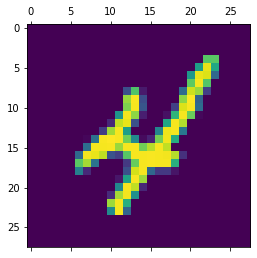

In [80]:
plt.matshow(x_train[9])

In [94]:
x_train1=x_train.reshape(len(x_train),28*28)
x_test1=x_test.reshape(len(x_test),28*28)

In [95]:
x_train1=x_train1/255
x_test1=x_test1/255

In [121]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train1,y_train,epochs=5,verbose=1)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2975 - accuracy: 0.9176
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1445 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1037 - accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0799 - accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0653 - accuracy: 0.9802


In [112]:
predict=model.predict(x_test1)

In [113]:
np.argmax(predict[0])

7

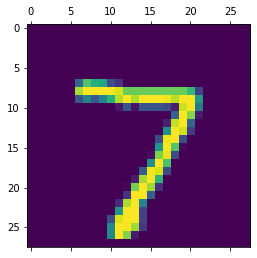

In [114]:
plt.matshow(x_test[0])

In [115]:
y_labels=[np.argmax(i) for i in predict]

In [116]:
y_labels[:4]

[7, 2, 1, 0]

In [117]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [118]:
tf.math.confusion_matrix(y_test,y_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    3,    0,    3,    1,    5,    1],
       [   0, 1126,    3,    0,    0,    0,    1,    0,    5,    0],
       [   3,    3,  999,    8,    1,    0,    1,    2,   14,    1],
       [   0,    0,    8,  980,    1,    7,    0,    3,    8,    3],
       [   1,    0,    2,    1,  956,    2,    4,    0,    2,   14],
       [   2,    0,    0,    8,    1,  872,    3,    0,    4,    2],
       [   4,    3,    1,    1,    8,   17,  920,    0,    4,    0],
       [   0,    9,   11,    7,    3,    1,    0,  973,    7,   17],
       [   2,    0,    2,    5,    4,    2,    3,    2,  951,    3],
       [   2,    3,    0,    7,    8,    3,    0,    2,    5,  979]],
      dtype=int32)>